In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.interpolate import interp1d
from scipy import interp, arange, array, exp
from scipy.interpolate import InterpolatedUnivariateSpline
%matplotlib inline
import sys,os

# plot style
plot_style = {'notebook':'../include/notebook.mplstyle','aps':'../include/aps.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])
figsize = plt.rcParams['figure.figsize']
plt.rcParams['text.latex.preamble'] = f'\input{{{os.getcwd()}/../include/texheader}}'

In [2]:
He_Graphene_dat = np.loadtxt("../data/he_potential.txt")

In [3]:
QMC_r = np.trim_zeros(He_Graphene_dat[:,0])
szalewicz_V = np.trim_zeros(He_Graphene_dat[:,1])
DFT_r = He_Graphene_dat[:,2]
He_He_V_DFT = He_Graphene_dat[:,3]
r_MP2 = np.trim_zeros(He_Graphene_dat[:,4])
V_He_MP2 = He_Graphene_dat[:len(r_MP2),5]
QMC_z = np.trim_zeros(He_Graphene_dat[:,6])
QMC_V = He_Graphene_dat[:len(QMC_z),7]
#QMC_z2 = np.trim_zeros(He_Graphene_V0[:,0])
#QMC_V2 = He_Graphene_V0[1:,1]
DFT_Z = np.trim_zeros(He_Graphene_dat[:,8])
He_Graphene_DFT = He_Graphene_dat[:len(DFT_Z),9]
z_MP2 = np.trim_zeros(He_Graphene_dat[:,10])
V_G_MP2 = He_Graphene_dat[:len(z_MP2),11]


In [4]:
z_MP2_no_repeat = np.concatenate((z_MP2[0:4] , z_MP2[6:11], z_MP2[12:18], z_MP2[20:]))
V_G_MP2_no_repeat = np.concatenate((V_G_MP2[0:4] , V_G_MP2[6:11], V_G_MP2[12:18], V_G_MP2[20:]))
s = InterpolatedUnivariateSpline(z_MP2_no_repeat, V_G_MP2_no_repeat, k=2)
V_MP2_G_interp = s(DFT_Z)

Plotting

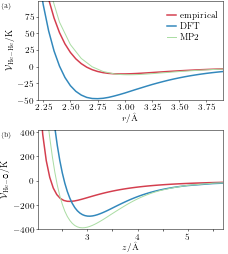

In [19]:
colors = ["#d43e4e", "#abdda4", "#3288bc"]

fig, ax = plt.subplots(2, 1, figsize = [3.4039, 2*2.10373]) 
ax[0].plot(QMC_r, szalewicz_V, color = colors[0])
ax[0].plot(DFT_r, He_He_V_DFT, color = colors[2])
ax[0].plot(r_MP2, V_He_MP2, label = 'MP2', color = colors[1], linewidth=1)
ax[0].set_xlim(2.2, 3.9)
ax[0].set_ylim(-50,99)
#ax[0].set_title("He-He")
ax[0].set_xlabel(r'$r$/\AA')
ax[0].set_ylabel(r"$\mathcal{V}_{\rm He-He}$/K")
ax[0].text(-0.2,0.98,'(a)', fontsize=7, ha='left',va='top',transform=ax[0].transAxes)
ax[0].xaxis.set_major_locator(MultipleLocator(0.25))
ax[0].yaxis.set_major_locator(MultipleLocator(25))
#ax[0].tick_params(which='minor', direction="out", top = False, bottom=True, left=False, right=True, labelleft = False,
#                                   labelright = True, length=2.5)
#ax[0].tick_params(which='major', direction="out", top = False, bottom=True, left=True, right=False)


ax[1].plot(QMC_z, QMC_V, label = 'empirical', color = colors[0])
ax[1].plot(DFT_Z, He_Graphene_DFT, label = 'DFT', color = colors[2])
#ax[1].plot(zz,V1, label = 'Graphite')
ax[1].plot(DFT_Z, V_MP2_G_interp, color = colors[1], linewidth=1)
#ax[1].plot(z_Graphite_Composite,V_Graphite_Composite, label = 'Graphite?', color = colors[2], linewidth=1)
ax[1].set_xlim(2.01, 5.7)
ax[1].set_ylim(-400,420)
ax[1].set_xlabel(r'$z$/\AA')
ax[1].set_ylabel(r"$\mathcal{V}_{\rm He-\graphene}$/K")
ax[1].yaxis.set_label_position("left")
#ax[1].set_title("He-Graphene")
ax[1].text(-0.2,0.98,'(b)', fontsize=7, ha='left',va='top',transform=ax[1].transAxes)
ax[1].xaxis.set_minor_locator(MultipleLocator(0.5))
#ax[1].tick_params(which='minor', direction="out", top = False, bottom=True, left=True, right=False, labelleft = True,
#                                   labelright = False, length=2.5)
#ax[1].tick_params(which='major', direction="out", top = False, bottom=True, left=True, right=False, labelleft = True,
#                                   labelright = False, length=4)

#fig.subplots_adjust(wspace=0.03, top=0.7)
fig.subplots_adjust(right = 0.88, hspace=0.3)
#fig.tight_layout()

handles2, labels2 = ax[0].get_legend_handles_labels()
handles, labels = ax[1].get_legend_handles_labels()
handles.extend(handles2)
labels.extend(labels2)
fig.legend(handles, labels, bbox_to_anchor=(0.92,0.83), frameon = False, handlelength = 1)
#fig.legend(handles, labels, loc='upper center', frameon = True, ncol=3, handlelength = 1)


#plt.legend()
#plt.show()

plt.savefig('../plots/He_Graphene_Potential.pdf', dpi=300, transparent=False, bbox_inches ='tight') 